#**Predicting User Churn for an E-commerce Platform**

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
import plotly.express as px

###**Data Loading**

In [277]:
df = pd.read_csv('events.csv')
df.head()

event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price              user_id  \
0          electronics.telephone          NaN   31.90  1515915625519388267   
1    computers.components.cooler       zalman   17.16  1515915625519380411   
2                            NaN          NaN    9.81  1515915625513238515   
3  computers.peripherals.printer       pantum  113.81  1515915625519014356   
4                            NaN  cameronsino   15.87  1515915625510743344   

  user_session  
0   LJuJVLEjPT  
1   tdicluNnRY  
2   4TMArHtXQy  
3   aGFYrNgC08  
4   aa4mmk0kwQ

In [278]:
df.shape

(885129, 9)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [280]:
df.describe()

product_id   category_id          price       user_id
count  8.851290e+05  8.851290e+05  885129.000000  8.851290e+05
mean   1.906621e+06  2.144423e+18     146.328713  1.515916e+18
std    1.458708e+06  6.165105e+14     296.807683  3.747287e+07
min    1.020000e+02  2.144416e+18       0.220000  1.515916e+18
25%    6.988030e+05  2.144416e+18      26.460000  1.515916e+18
50%    1.452883e+06  2.144416e+18      65.710000  1.515916e+18
75%    3.721194e+06  2.144416e+18     190.490000  1.515916e+18
max    4.183880e+06  2.227847e+18   64771.060000  1.515916e+18

###**Data Cleaning**

In [281]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [282]:
df.duplicated().sum()

655

In [283]:
df = df.drop_duplicates()

In [284]:
df.reset_index(drop=True, inplace=True)

In [285]:
df.duplicated().sum()

0

In [286]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

In [287]:
df.select_dtypes(include='object').nunique()

event_type            3
category_code       107
brand               999
user_session     490398
dtype: int64

In [288]:
missing_values = df.isnull().sum()
missing_values

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236047
brand            212232
price                 0
user_id               0
user_session        162
dtype: int64

In [289]:
df['category_code'] = df['category_code'].fillna("NA")
df['brand'] = df['brand'].fillna("NA")
df['user_session'] = df['user_session'].fillna("NA")

In [290]:
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

###**EDA**

In [291]:
a = df['event_type'].value_counts()
a

event_type
view        793099
cart         54032
purchase     37343
Name: count, dtype: int64

In [292]:
chart = px.bar(data_frame=a, x=a.index, y=a.values, labels={'x': 'Category', 'y': 'Frequency'},
               title="Distribution of Categories", color=a.index,  color_discrete_sequence=px.colors.sequential.Plasma)
chart.show()

In [293]:
brand_distribution = df['brand'].value_counts().reset_index()
# brand_distribution = brand_distribution[brand_distribution['brand'] != 'NA']
brand_distribution

brand   count
0           NA  212232
1         asus   27660
2     gigabyte   27652
3          msi   24864
4        palit   24787
..         ...     ...
995     elekta       1
996    vitesse       1
997      vitek       1
998     docash       1
999  cipherlab       1

[1000 rows x 2 columns]

In [294]:
popular_brands = df['brand'].value_counts().head(6).reset_index()
popular_brands = popular_brands[popular_brands['brand'] != 'NA']
popular_brands

brand  count
1      asus  27660
2  gigabyte  27652
3       msi  24864
4     palit  24787
5   samsung  23188

In [295]:
popular_brands.columns = ['brand_name', 'frequency']
bar_chart = px.bar(popular_brands, x='brand_name', y='frequency',
                   title="Top 5 Brands", labels={'brand_name': 'Brand', 'frequency': 'Frequency'},
                   color_discrete_sequence=px.colors.qualitative.Pastel)
bar_chart.show()

In [296]:
activity_per_day = df.groupby(df['event_time'].dt.date).size().reset_index(name='total_events')
line_chart = px.line(activity_per_day, x='event_time', y='total_events',
                     labels={'timestamp': 'Date', 'total_events': 'Event Count'},
                     title="Trend of Daily Events", color_discrete_sequence=['#FF7F0E'])
line_chart.show()

In [297]:
price_distribution = df['price'].value_counts().head(5).reset_index()
price_distribution

price  count
0  397.48  14611
1  292.83   7086
2  204.29   6901
3   32.22   6123
4   43.11   5503

In [298]:
price_distribution.columns = ['price_value', 'frequency']
price_plot = px.bar(price_distribution, x='price_value', y='frequency', title="Top 5 Price Counts",
                    labels={'price_value': 'Price', 'frequency': 'Frequency'}, color='price_value',
                    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
price_plot.update_layout(yaxis_title="Frequency")
price_plot.show()

###**Feature Enginnering**

In [299]:
most_recent_event = df.groupby('user_id')['event_time'].max().reset_index(name='last_event')
most_recent_event['Recency'] = (most_recent_event['last_event'].max() - most_recent_event['last_event']).dt.days

event_count_per_user = df.groupby('user_id').size().reset_index(name='Frequency')

purchase_data = df[df['event_type'] == 'purchase']
total_spent_per_user = purchase_data.groupby('user_id')['price'].sum().reset_index(name='Monetary')

# Recency, Frequency and Monetary
user_features = most_recent_event[['user_id', 'Recency']].merge(
                    event_count_per_user, on='user_id', how='left').merge(
                    total_spent_per_user, on='user_id', how='left').fillna(0)
user_features.head()

user_id  Recency  Frequency  Monetary
0  1515915625353226922      122          1       0.0
1  1515915625353230067      145          1       0.0
2  1515915625353230683       78         13       0.0
3  1515915625353230922      149          1       0.0
4  1515915625353234047       10         36       0.0

In [300]:
df['session_start'] = df.groupby(['user_id', 'user_session'])['event_time'].transform('min')
df['session_end'] = df.groupby(['user_id', 'user_session'])['event_time'].transform('max')

df['session_duration_seconds'] = (df['session_end'] - df['session_start']).dt.seconds

user_session_summary = df.groupby('user_id').agg(total_sessions=('user_session', 'nunique')).reset_index()
user_session_summary.head()

user_id  total_sessions
0  1515915625353226922               1
1  1515915625353230067               1
2  1515915625353230683               4
3  1515915625353230922               1
4  1515915625353234047               1

In [301]:
view_data = df[df['event_type'] == 'view']
cart_data = df[df['event_type'] == 'cart']
purchase_data = df[df['event_type'] == 'purchase']

user_views = view_data.groupby('user_id').size().reset_index(name='view_count')
user_carts = cart_data.groupby('user_id').size().reset_index(name='cart_count')
user_purchases = purchase_data.groupby('user_id').size().reset_index(name='purchase_count')

behavioral_metrics = user_views.merge(user_carts, on='user_id', how='left') \
                               .merge(user_purchases, on='user_id', how='left') \
                               .fillna(0)

behavioral_metrics['view_cart_ratio'] = behavioral_metrics['view_count'] / (behavioral_metrics['cart_count'] + 1)
behavioral_metrics['cart_purchase_ratio'] = behavioral_metrics['cart_count'] / (behavioral_metrics['purchase_count'] + 1)

behavioral_metrics.head()

user_id  view_count  cart_count  purchase_count  \
0  1515915625353226922           1         0.0             0.0   
1  1515915625353230067           1         0.0             0.0   
2  1515915625353230683          13         0.0             0.0   
3  1515915625353230922           1         0.0             0.0   
4  1515915625353234047          36         0.0             0.0   

   view_cart_ratio  cart_purchase_ratio  
0              1.0                  0.0  
1              1.0                  0.0  
2             13.0                  0.0  
3              1.0                  0.0  
4             36.0                  0.0

In [302]:
data_frames = [user_features, user_session_summary, behavioral_metrics]
merged_features = data_frames[0]

for df in data_frames[1:]:
    merged_features = pd.merge(merged_features, df, on='user_id', how='left')
merged_features = merged_features.fillna(0)
merged_features.head()

user_id  Recency  Frequency  Monetary  total_sessions  \
0  1515915625353226922      122          1       0.0               1   
1  1515915625353230067      145          1       0.0               1   
2  1515915625353230683       78         13       0.0               4   
3  1515915625353230922      149          1       0.0               1   
4  1515915625353234047       10         36       0.0               1   

   view_count  cart_count  purchase_count  view_cart_ratio  \
0         1.0         0.0             0.0              1.0   
1         1.0         0.0             0.0              1.0   
2        13.0         0.0             0.0             13.0   
3         1.0         0.0             0.0              1.0   
4        36.0         0.0             0.0             36.0   

   cart_purchase_ratio  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

###**Modeling**

In [303]:
selected_columns = ['Recency', 'Frequency', 'Monetary', 'total_sessions', 'view_count', 'cart_count', 'purchase_count',
                    'view_cart_ratio', 'cart_purchase_ratio']
X = merged_features[selected_columns]

# if recency > 30, consider it as churn (1), otherwise non-churn (0)
Y = (merged_features['Recency'] <= 30).astype(int)

print(X.head())
print('\n')
print(Y.head())

   Recency  Frequency  Monetary  total_sessions  view_count  cart_count  \
0      122          1       0.0               1         1.0         0.0   
1      145          1       0.0               1         1.0         0.0   
2       78         13       0.0               4        13.0         0.0   
3      149          1       0.0               1         1.0         0.0   
4       10         36       0.0               1        36.0         0.0   

   purchase_count  view_cart_ratio  cart_purchase_ratio  
0             0.0              1.0                  0.0  
1             0.0              1.0                  0.0  
2             0.0             13.0                  0.0  
3             0.0              1.0                  0.0  
4             0.0             36.0                  0.0  


0    0
1    0
2    0
3    0
4    1
Name: Recency, dtype: int64


In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [305]:
X_train.shape, X_test.shape

((325826, 9), (81457, 9))

In [306]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalized_X_train = normalizer.fit_transform(X_train)
normalized_X_test = normalizer.transform(X_test)
normalized_X_train[:3]

array([[0.15286624, 0.        , 0.        , 0.        , 0.00174825,
        0.        , 0.        , 0.00174825, 0.        ],
       [0.20382166, 0.00700525, 0.00533407, 0.00395257, 0.00524476,
        0.        , 0.03571429, 0.00524476, 0.        ],
       [0.50955414, 0.        , 0.        , 0.        , 0.00174825,
        0.        , 0.        , 0.00174825, 0.        ]])

In [307]:
from sklearn.linear_model import LogisticRegressionCV

log_reg_model = LogisticRegressionCV(cv=5, max_iter=1000)

log_reg_model.fit(normalized_X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000
ROC-AUC: 1.0000


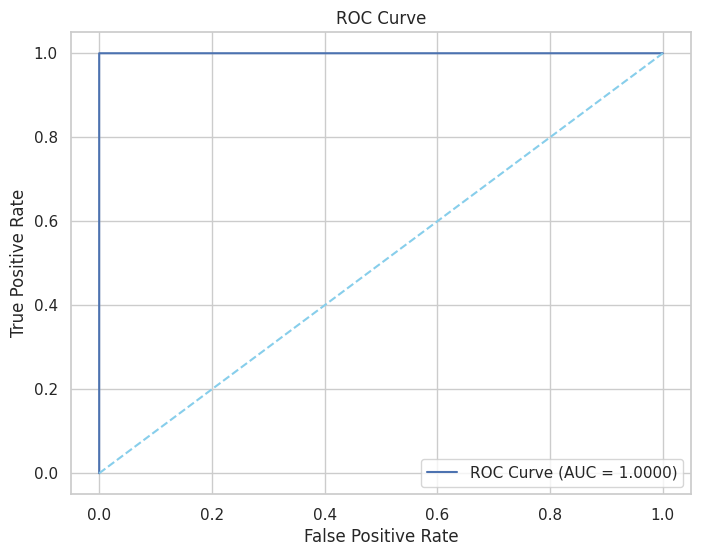

In [308]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
import seaborn as sns

y_pred = log_reg_model.predict(normalized_X_test)
y_pred_prob = log_reg_model.predict_proba(normalized_X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_value = auc(fpr, tpr)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='skyblue')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

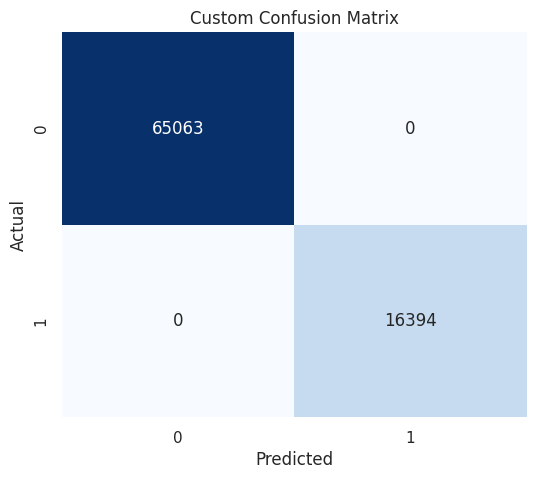

In [309]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
confusion_df = pd.crosstab(results_df['Actual'], results_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Custom Confusion Matrix')
plt.show()

In [310]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y_pred = cross_val_predict(log_reg_model, normalized_X_train, y_train, cv=5)

precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

cv_scores = cross_val_score(log_reg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([1., 1., 1., 1., 1.])